# stdev

- stdv가 클수록 시장 변동성이 크거나 커다란 가격 움직임이 예상되므로 위험 추정과 다른 트레이딩 행태에 증가된 변동성을 고려해서 전략 구축

In [1]:
import pandas as pd
from pandas_datareader import data
import statistics as stats
import math as math
import matplotlib.pyplot as plt

In [2]:
start_date = '2014-01-01'
end_date = '2018-01-01'
SRC_DATA_FILENAME = 'goog_data.pkl'

try:
  goog_data2 = pd.read_pickle(SRC_DATA_FILENAME)
except FileNotFoundError:
  goog_data2 = data.DataReader('GOOG', 'yahoo', start_date, end_date)
  goog_data2.to_pickle(SRC_DATA_FILENAME)

goog_data = goog_data2.tail(620)

close = goog_data['Close']

In [4]:
time_period = 20   # 룩백기간
history = []       # 가격 히스토리
sma_values = []    # 시각화를 위해 이동평균 값을 추적
stddev_values = [] # 계산된 stdev 값의 히스토리

for close_price in close:
  history.append(close_price)
  if len(history) > time_period: # time_period 개수까지의 가격을 추적
    del (history[0])

  sma = stats.mean(history)
  sma_values.append(sma)
  variance = 0     # 분산은 표준편차의 제곱
  for hist_price in history:
    variance = variance + ((hist_price - sma) ** 2)

  stdev = math.sqrt(variance / len(history))

  stddev_values.append(stdev)

goog_data = goog_data.assign(ClosePrice=pd.Series(close, index=goog_data.index))
goog_data = goog_data.assign(StandardDeviationOver20Days=pd.Series(stddev_values, index=goog_data.index))

close_price = goog_data['ClosePrice']
stddev = goog_data['StandardDeviationOver20Days']



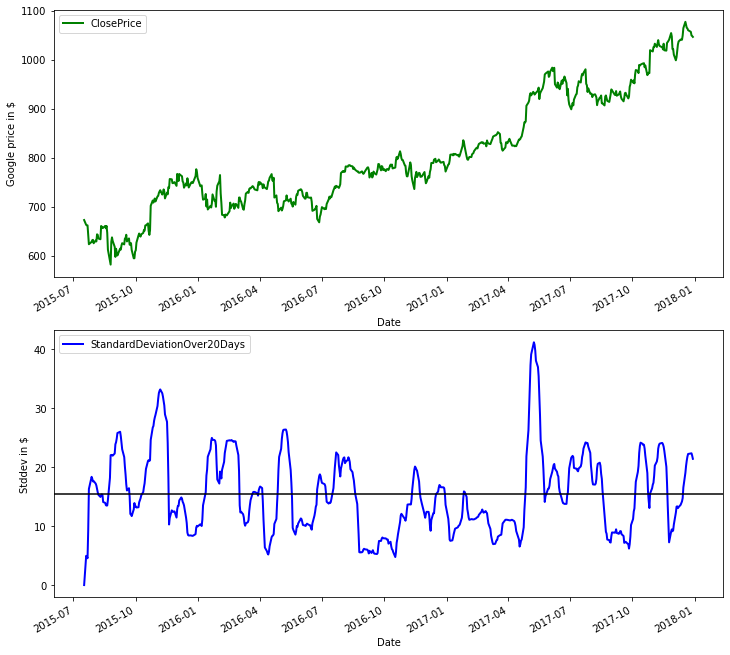

In [6]:
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(211, ylabel='Google price in $')
close_price.plot(ax=ax1, color='g', lw=2., legend=True)
ax2 = fig.add_subplot(212, ylabel='Stddev in $')
stddev.plot(ax=ax2, color='b', lw=2., legend=True)
ax2.axhline(y=stats.mean(stddev_values), color='k')
plt.show()
